In [42]:
# Standard libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Paths (edit if needed)
BASE = "/mnt/e/bootcamp/Project/azmmon_farz"
DIVAR_PATH = "/mnt/e/bootcamp/Project/Divar.csv"
CLEAN_FILE = f"{BASE}/cleaned_23_42 (1).csv"
UTM_FILE   = f"{BASE}/utm_coords1.csv"


In [ ]:
# Read selected amenity columns from the main Divar dataset
amen_cols_divar = ["has_security_guard", "has_barbecue", "has_pool"]
df_divar = pd.read_csv(DIVAR_PATH, usecols=amen_cols_divar, encoding="utf-8", low_memory=False)

# Ensure binary integer (0/1); treat NaN as 0/False
df_divar = df_divar.fillna(False).astype(int)

In [46]:
# Read balcony/elevator columns from the cleaned file
amen_cols_clean = ["has_balcony", "has_elevator"]
df_clean = pd.read_csv(CLEAN_FILE, usecols=amen_cols_clean, encoding="utf-8", low_memory=False)

# Force numeric → map strictly to 0/1 (only 1 stays 1; everything else -> 0)
for c in amen_cols_clean:
    df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce").fillna(0)
    df_clean[c] = (df_clean[c] == 1).astype(int)

In [47]:
# Show value counts for each amenity (useful for QA in the report)
for c in amen_cols_divar:
    print(f"== {c} ==")
    print(df_divar[c].value_counts(dropna=False))

for c in amen_cols_clean:
    print(f"\n== {c} ==")
    print(df_clean[c].value_counts(dropna=False))

# Optional: ensure row counts match before concatenation
print("\nRow counts -> Divar:", len(df_divar), "| Clean:", len(df_clean))


== has_security_guard ==
has_security_guard
0    993319
1      6681
Name: count, dtype: int64
== has_barbecue ==
has_barbecue
0    992179
1      7821
Name: count, dtype: int64
== has_pool ==
has_pool
0    996279
1      3721
Name: count, dtype: int64

== has_balcony ==
has_balcony
0    587212
1    412788
Name: count, dtype: int64

== has_elevator ==
has_elevator
0    634852
1    365148
Name: count, dtype: int64

Row counts -> Divar: 1000000 | Clean: 1000000


In [48]:
# Keep only the target amenity columns
part_divar = df_divar[amen_cols_divar]
part_clean = df_clean[amen_cols_clean]

# Column-wise concat by index (assumes same order / same row count)
all_features = pd.concat([part_divar, part_clean], axis=1)

# Read UTM coordinates and attach
utm_cols = ["UTM_Easting", "UTM_Northing"]
df_utm = pd.read_csv(UTM_FILE, usecols=utm_cols, encoding="utf-8", low_memory=False)

# Final working frame: amenities + UTM (by index)
data = pd.concat([all_features, df_utm], axis=1)
data.head()


,has_security_guard,has_barbecue,has_pool,has_balcony,has_elevator,UTM_Easting,UTM_Northing
0,0,0,0,0,0,4.942723e+05,3.963064e+06
1,0,0,0,0,1,5.399785e+05,3.958870e+06
2,0,0,0,0,1,5.337844e+05,3.951168e+06
3,0,0,0,0,1,5.384862e+05,3.960125e+06
4,0,0,0,1,1,1.271575e+06,4.047854e+06


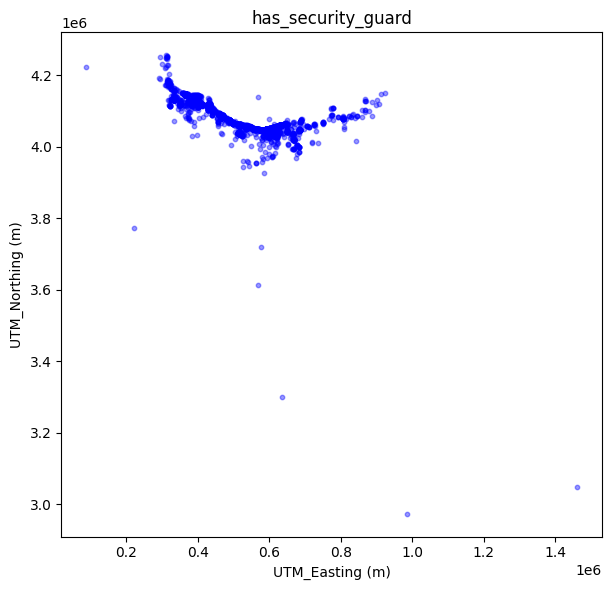

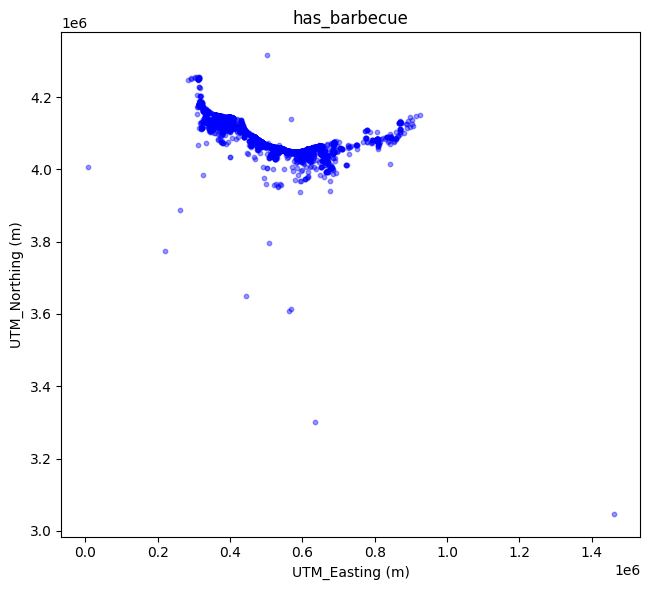

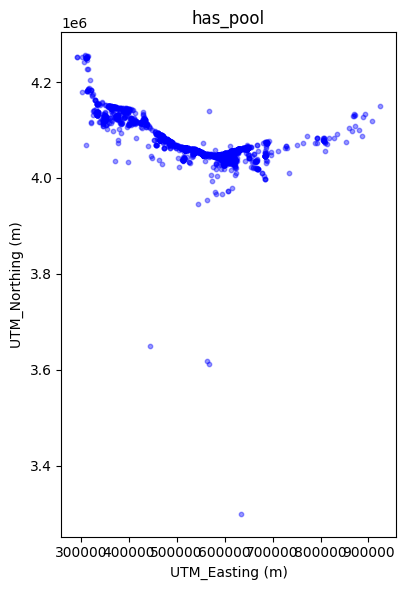

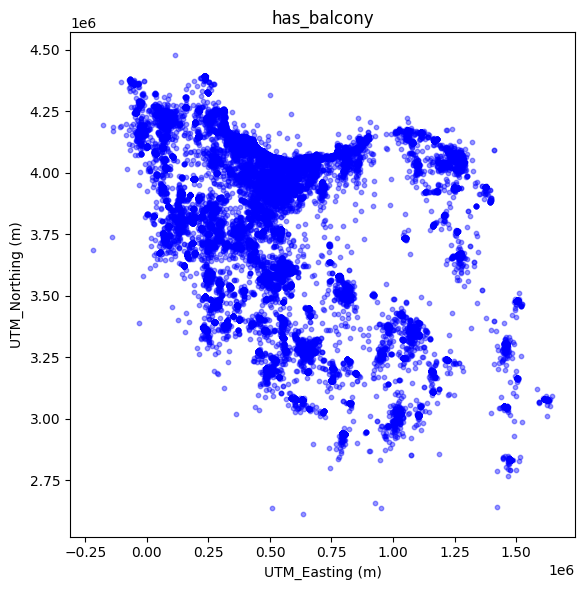

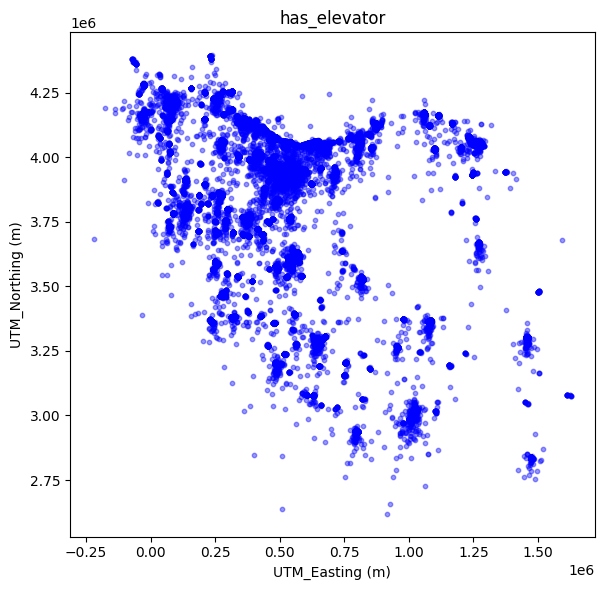

In [50]:
# One scatter for each amenity column; blue points, small markers
for col in amenities:
    subset = data[data[col] == 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(subset["UTM_Easting"], subset["UTM_Northing"], s=10, alpha=0.4, c="blue")
    plt.xlabel("UTM_Easting (m)")
    plt.ylabel("UTM_Northing (m)")
    plt.title(col)
    plt.gca().set_aspect("equal", "box")
    plt.grid(False)
    plt.tight_layout()
    plt.show()
